>Instituto de Informática  <br>
Alex Echeverria<br>
### Universidade Federal de Goiás <br>
### **Inteligência Artificial Aplicada a Saúde** <br>

# Batimentos cardíacos - MIT-BIH | Paciente 2


#### **Lê o conjunto de dados e os estrutura em diferentes variáveis**

In [ ]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Paciente = '2';

# Definir o caminho onde o dataset se encontra
base_path = 'https://raw.githubusercontent.com/aveusalex/Predicao_Extra_sistolicos/main/Paciente2/'

# # Carregar dataset 
xtest = pd.read_csv(base_path + 'Teste.csv')
xtrain = pd.read_csv(base_path + 'Treino.csv')
idx_normal = pd.read_csv(base_path + 'Index.csv')

# Separar y referencia
ytest = xtest['82']
ytrain = xtrain['82']

# Remover y do conjunto de treino
xtest = xtest.drop(columns=['82'])
xtrain = xtrain.drop(columns=['82'])

In [71]:
xtest.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81
0,-1.812987,-1.809091,-1.742857,-1.628571,-1.510390,-1.431169,-1.406494,-1.414286,-1.418182,-1.392208,-1.322078,-1.194805,-1.037662,-0.827273,-0.637662,-0.429870,-0.249351,-0.112987,0.031169,0.136364,2.129870e-01,0.233766,0.253247,0.349351,0.541558,0.846753,1.274026,1.931169,2.825974,3.964935,5.233766,6.538961,7.653247,8.329870,8.558442,8.293506,7.570130,6.412987,4.779221,2.777922,...,-1.723377,-4.015584,-6.161039,-8.066234,-9.715584,-11.063636,-12.019481,-12.403896,-12.235065,-11.457143,-10.137662,-8.310390,-6.228571,-4.164935,-2.296104,-0.640260,0.728571,1.775325,2.472727,2.724675,2.715584,2.476623,2.145455,1.802597,1.493506,1.157143,0.816883,0.522078,0.310390,0.124675,-0.001299,-0.090909,-0.100000,-0.040260,0.007792,0.055844,0.061039,0.036364,-0.032468,-0.061039
1,-0.228571,-0.155844,-0.079221,-0.015584,-0.014286,0.010390,-0.025974,0.016883,0.046753,0.119481,0.161039,0.194805,0.232468,0.259740,0.333766,0.401299,0.457143,0.535065,0.659740,0.894805,1.183117e+00,1.437662,1.583117,1.632468,1.592208,1.406494,1.198701,0.815584,0.323377,-0.370130,-1.087013,-1.801299,-2.375325,-2.658442,-2.581818,-2.100000,-1.316883,-0.468831,0.154545,0.277922,...,-0.383117,-0.731169,-0.961039,-1.027273,-0.922078,-0.623377,-0.257143,0.074026,0.203896,0.076623,-0.237662,-0.614286,-0.975325,-1.209091,-1.122078,-0.596104,0.375325,1.562338,2.627273,3.167532,3.151948,2.762338,2.237662,1.774026,1.357143,1.053247,0.901299,0.805195,0.844156,0.906494,0.958442,0.954545,0.902597,0.825974,0.722078,0.638961,0.598701,0.535065,0.523377,0.488312
2,-0.451948,-0.370130,-0.293506,-0.209091,-0.131169,-0.050649,0.028571,0.037662,0.087013,0.138961,0.140260,0.196104,0.248052,0.292208,0.338961,0.336364,0.370130,0.436364,0.509091,0.635065,8.000000e-01,0.911688,0.870130,0.636364,0.176623,-0.485714,-1.297403,-2.298701,-3.516883,-4.818182,-6.038961,-6.993506,-7.532468,-7.610390,-7.190909,-6.296104,-5.087013,-3.777922,-2.644156,-1.822078,...,-0.762338,-0.103896,0.664935,1.512987,2.398701,3.249351,4.019481,4.503896,4.559740,4.241558,3.723377,3.157143,2.693506,2.463636,2.538961,3.020779,3.754545,4.548052,5.120779,5.244156,4.888312,4.174026,3.383117,2.594805,1.945455,1.518182,1.275325,1.170130,1.072727,0.963636,0.883117,0.857143,0.802597,0.710390,0.615584,0.536364,0.544156,0.525974,0.538961,0.566234
3,-0.383117,-0.427273,-0.476623,-0.598701,-0.698701,-0.762338,-0.812987,-0.820779,-0.783117,-0.672727,-0.506494,-0.301299,-0.115584,-0.010390,0.066234,0.155844,0.203896,0.263636,0.346753,0.461039,7.298701e-01,1.163636,1.833766,2.724675,3.801299,5.070130,6.355844,7.584416,8.740260,9.783117,10.718182,11.501299,12.064935,12.306494,12.157143,11.551948,10.512987,8.971429,6.985714,4.641558,...,-0.603896,-3.193506,-5.572727,-7.661039,-9.310390,-10.511688,-11.319481,-11.744156,-11.825974,-11.538961,-10.902597,-9.992208,-8.884416,-7.662338,-6.390909,-5.128571,-3.900000,-2.829870,-1.924675,-1.176623,-0.625974,-0.212987,0.022078,0.164935,0.231169,0.254545,0.206494,0.220779,0.280519,0.329870,0.396104,0.507792,0.544156,0.584416,0.581818,0.509091,0.422078,0.350649,0.283117,0.249351
4,-1.629870,-1.742857,-1.851948,-1.983117,-2.107792,-2.181818,-2.174026,-2.124675,-2.063636,-1.914286,-1.762338,-1.623377,-1.474026,-1.397403,-1.309091,-1.181818,-1.045455,-0.890909,-0.631169,-0.348052,2.879641e-15,0.468831,1.105195,1.922078,2.850649,3.877922,4.887013,5.928571,6.932468,7.833766,8.694805,9.440260,9.955844,10.257143,10.119481,9.570130,8.681818,7.459740,5.898701,4.096104,...,-0.116883,-2.303896,-4.412987,-6.242857,-7.776623,-8.998701,-9.953247,-10.540260,-10.811688,-10.771429,-10.438961,-9.829870,-9.006494,-8.010390,-6.946753,-5.837662,-4.732468,-3.676623,-2.744156,-1.931169,-1.341558,-0.938961,-0.655844,-0.535065,-0.427273,-0.301299,-0.233766,-0.163636,-0.055844,-0.019481,0.

In [72]:
xtest.shape

(125, 81)

#### **Exibe os primeiros registros de batimentos normais e extra sistólicos, repectivamente**

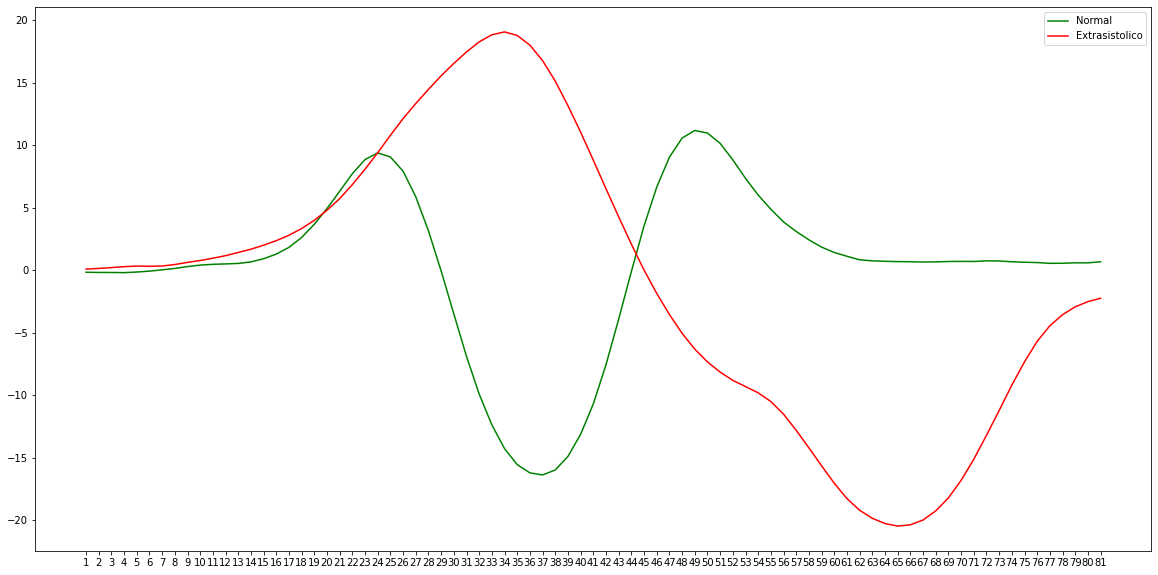

In [74]:
fig, axs = plt.subplots(1, figsize=(20, 10))

# plotar primeiro batimento normal
axs.plot(xtrain.iloc[np.where(ytrain == 1)[0][0]], color='green')

# plotar primeiro batimento extra sistólico
axs.plot(xtrain.iloc[np.where(ytrain == -1)[0][0]], color='red')
axs.legend(['Normal', 'Extrasistolico'])

#### **Gera o modelo para realizar os agrupamentos**


> O número de clusters é igual à quantidade de classes no problema



In [ ]:
from sklearn.cluster import KMeans

# Gerar clusters pelo kmeans
km = KMeans(n_clusters=2, random_state=0).fit(xtrain)

#### **Identifica as classes mais próximas de cada centróide para realizar a classificação**
> Portanto se o cluster 0 estiver mais próximo dos batimentos normais <br>
Então o cluster 0 representa os batimentos normais e o cluster 1 os batimentos extra sistólicos. 

In [ ]:
real_c_y = []
for idx, c in enumerate(km.cluster_centers_):
  dist = np.linalg.norm(xtrain - c, axis=1)
  real_c_y.append((idx, ytrain.iloc[np.where(dist == dist.min())[0][0]]))

  del dist

print(real_c_y)

[(0, 1), (1, -1)]


#### **Atribui os novos dados aos clusters mais próximos**



In [ ]:
result = km.predict(xtest)
result_copy = result.copy()

In [ ]:
# Substituir os clusters formados pelo kmeans pelas classes reais
for c in range(len(real_c_y),):
  result[np.where(result_copy == c)[0]] = real_c_y[c][1]

In [ ]:
result

array([ 1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,
        1, -1, -1,  1, -1,  1], dtype=int32)

In [ ]:
ytest.to_list()

#### **Gera a matriz de confusão e acurácia total da classificação**


> As linhas são a referência (y real)
>> Linha 1 = Batimentos extra sistólicos <br>
Linha 2 = Batimentos normais 


> As colunas correspondem a saida do modelo
>> Coluna 1 = Batimentos extra sistólicos <br>
Coluna 2 = batimentos normais


[[ 8 18]
 [ 5 94]]


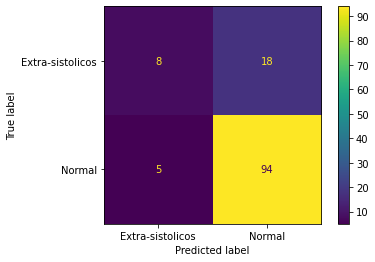

In [ ]:
from sklearn.metrics import confusion_matrix as conf_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Exibe a matriz de confusão
cm = conf_matrix(ytest, result)
print(cm)
disp = ConfusionMatrixDisplay(cm, ["Extra-sistolicos", "Normal", "Extra-sistolicos", "Normal"])
disp.plot()

In [ ]:
# Mostra acurácia total da classificação
correct_values = np.where(ytest == result)[0]
print("Acurácia: %f \n" % (correct_values.shape[0] / result.shape[0]))

del correct_values

Acurácia: 0.816000 



## Quanto o modelo previu corretamente dos extra-sistólicos?

In [79]:
# Temos 26 extra-sistólicos 

qtd_extra_sis = cm[0].sum() + cm[1][0]
qtd_extra_previstos_correto = cm[0][0]
qtd_extra_previstos_FP = cm[1][0]
qtd_extra_previstos_FN = cm[0][1]

In [63]:
def porcentagem(A:list) -> list:
    """
    Recebe um array de valores decimais com diversas casas decimais e retorna
    outro array de strings em porcentagem com duas casas decimais.
    """
    aux = []
    for i in A:
        var = str(format(float(i)*100, ".2f")) + "%"
        aux.append(var)

    return aux

In [ ]:
porcentagens = porcentagem([qtd_extra_previstos_correto, qtd_extra_previstos_FN, qtd_extra_previstos_FP] / qtd_extra_sis)
porcentagens

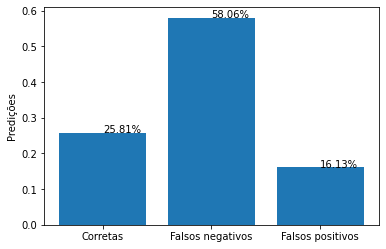

In [81]:
import matplotlib.pyplot as plt

porcentagens = [qtd_extra_previstos_correto, qtd_extra_previstos_FN, qtd_extra_previstos_FP] / qtd_extra_sis
porcentagens_str = porcentagem(porcentagens)
plot = plt.bar([0, 1, 2], porcentagens)
plt.xticks([0, 1, 2], ["Corretas", "Falsos negativos", "Falsos positivos"])
plt.ylabel('Predições')
for i in range(3):
    plt.text(i, porcentagens[i], porcentagens_str[i])
plt.show()